# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('data.xlsx')
%matplotlib inline

In [3]:
df.head()
# here AT is ambient temperature
# V is  exhaust vaccum
# AP is Ambient pressure
# RH is relative humidity
# PE is net hourly electrical energy output

# Here PE is dependent variable and all other are independent variable.

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Getting the inputs and output

In [9]:
X = df[['AT','V','AP','RH']].values

In [10]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [8]:
Y = df['PE'].values
Y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

### Creating the Training Set and the Test Set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=101,test_size=0.4)


In [16]:
X_train

array([[   3.95,   35.47, 1017.36,   84.88],
       [  14.56,   40.89, 1010.94,   79.57],
       [  32.16,   76.2 , 1008.04,   51.74],
       ...,
       [  11.48,   37.5 , 1014.38,   69.75],
       [   6.79,   39.37, 1019.79,   72.39],
       [   8.43,   40.6 , 1015.39,   91.81]])

In [17]:
X_test

array([[  11.91,   44.45, 1021.39,   84.49],
       [  14.91,   46.9 , 1019.59,   98.1 ],
       [  18.55,   61.87, 1008.45,   65.3 ],
       ...,
       [  10.1 ,   41.4 , 1024.29,   85.94],
       [  30.01,   68.27, 1006.88,   51.67],
       [  32.21,   71.85, 1008.25,   58.09]])

In [18]:
y_train

array([488.64, 467.53, 433.29, ..., 472.9 , 487.3 , 483.1 ])

In [19]:
y_test

array([466.52, 461.73, 450.73, ..., 474.28, 428.6 , 429.15])

## Part 2 - Building and training the model

### Building the model

In [20]:
from sklearn.linear_model import LinearRegression

### Training the model

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Inference

Making the predictions of the data points in the test set

In [25]:
prediction = lm.predict(X_test)
prediction

array([470.63895905, 461.87311927, 455.76462882, ..., 474.8614994 ,
       433.68419907, 427.55130047])

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

In [28]:
lm.predict([[15,40,1000,75]])

array([465.90352915])

## Part 3: Evaluating the model

### R-Squared

r squared - goodness of fit(greater is better)

In [33]:
from sklearn.metrics import r2_score
from sklearn import metrics
r2 = r2_score(y_test,prediction)

In [31]:
r2

0.9299062904281602

In [36]:
print('MAR :',metrics.mean_absolute_error(y_test,prediction))
print('MSE :',metrics.mean_squared_error(y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

MAR : 3.5655503019692487
MSE : 20.36853769330314
RMSE : 1.888266480656067


### Adjusted R-Squared

In [32]:
k= X_test.shape[1]
n= X_test.shape[0]
ad_r2 = 1-(1-r2)*(n-1)/(n-k-1) # formula for finding adjusted R-squared
ad_r2

0.9298329514696754

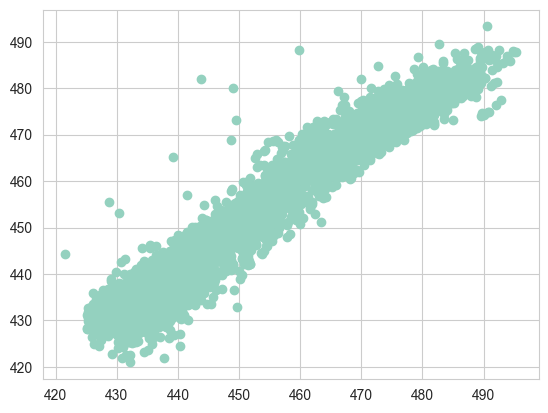

In [52]:
plt.scatter(y_test,prediction)

In [50]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

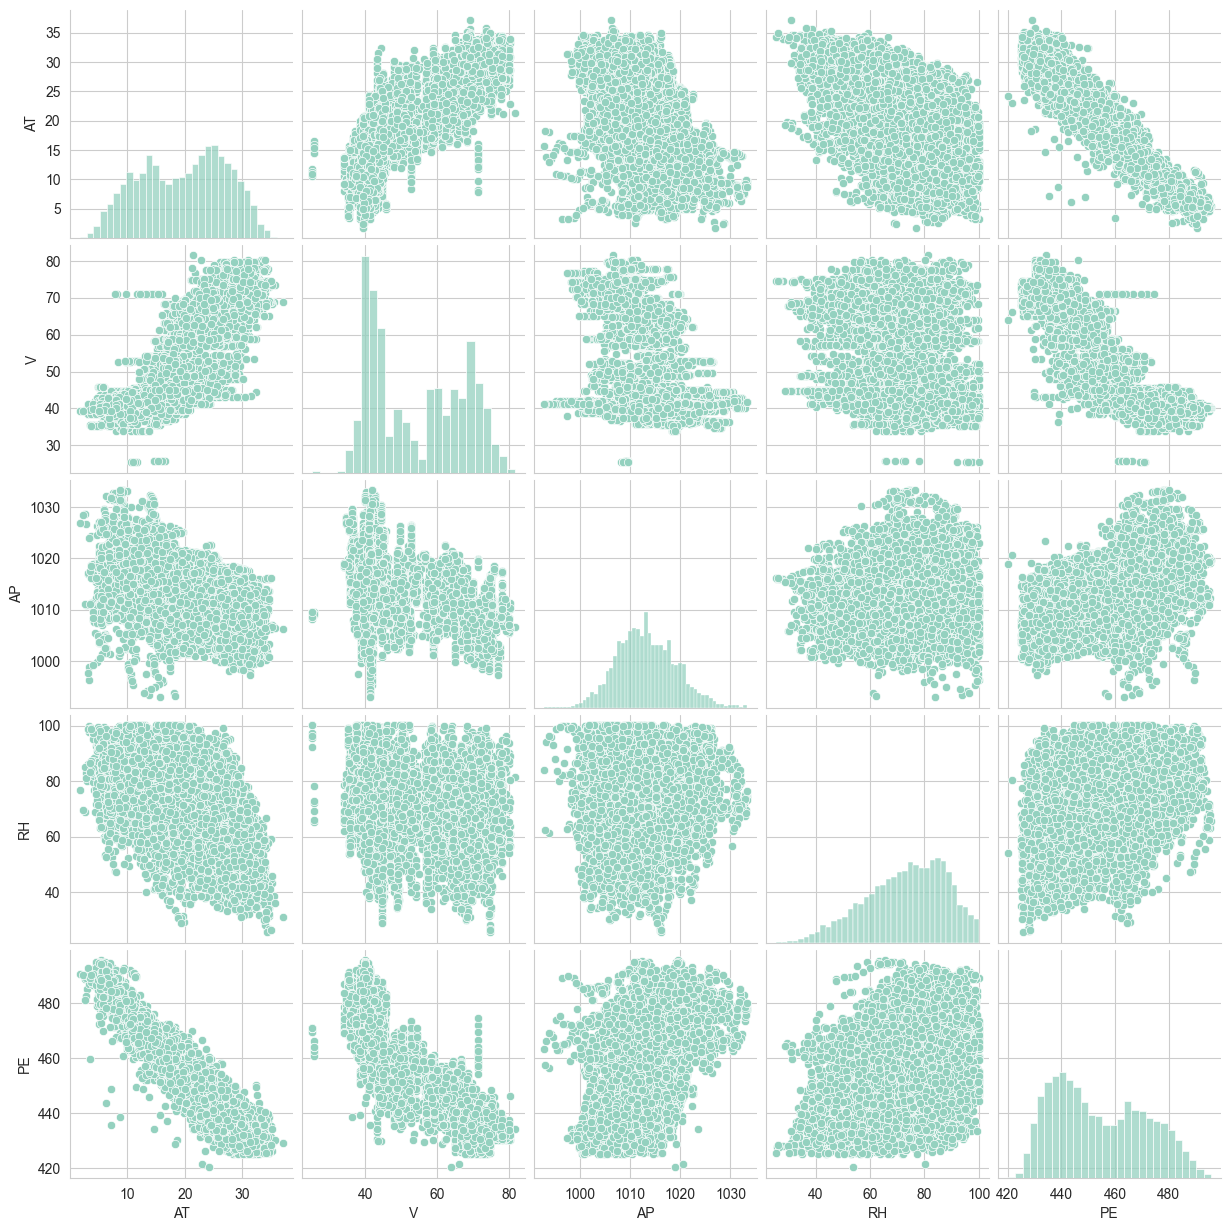

In [51]:
sns.pairplot(df)

In [53]:
sns.set_palette("bwr")
sns.set_style('whitegrid')

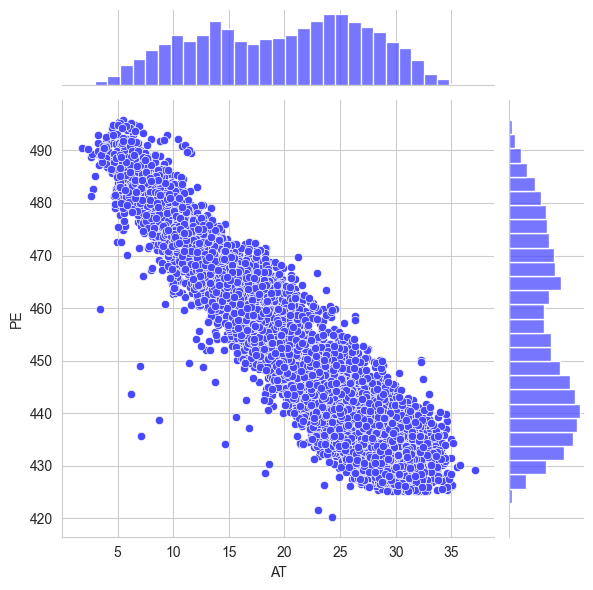

In [54]:
sns.jointplot(x='AT',y='PE',data=df)

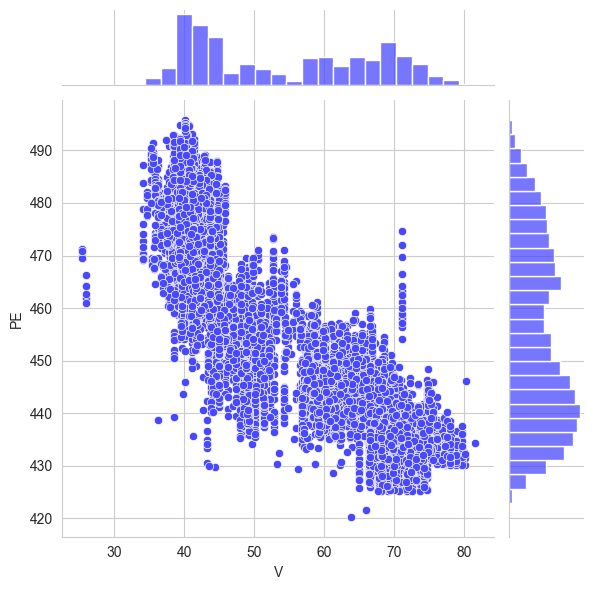

In [57]:
sns.jointplot(x='V',y='PE',data=df)

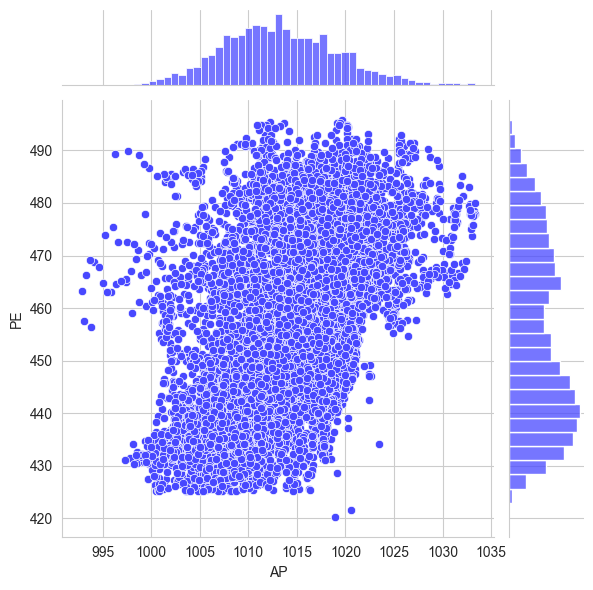

In [58]:
sns.jointplot(x='AP',y='PE',data=df)

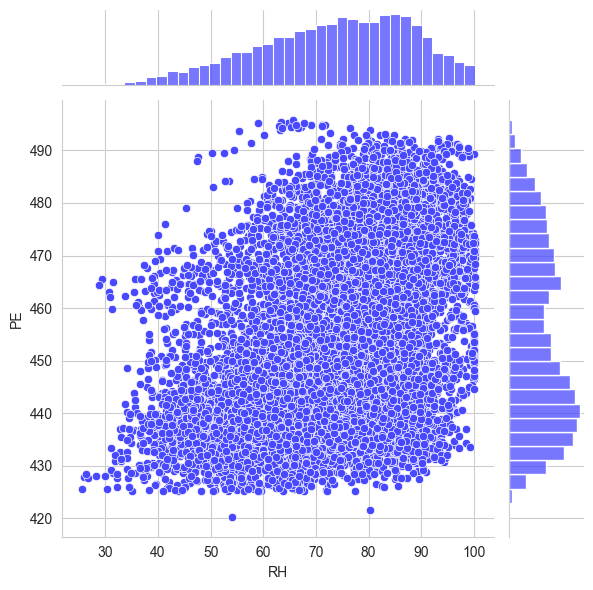

In [59]:
sns.jointplot(x='RH',y='PE',data=df)